In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data and sample a part to have as 'train' data

In [23]:
airports_full = pd.read_csv("venv/1990.csv.bz2", compression='bz2')
airports_full = airports_full.drop(["ArrTime", "ActualElapsedTime", "AirTime", "TaxiIn", "Diverted", "CarrierDelay",
                         "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], axis=1)
airports = airports_full.sample(frac=0.9, replace=False, random_state=42)

In [24]:
airports.count()

Year                4743804
Month               4743804
DayofMonth          4743804
DayOfWeek           4743804
DepTime             4696662
CRSDepTime          4743804
CRSArrTime          4743804
UniqueCarrier       4743804
FlightNum           4743804
TailNum                   0
CRSElapsedTime      4743804
ArrDelay            4682264
DepDelay            4696662
Origin              4743804
Dest                4743804
Distance            4659638
TaxiOut                   0
Cancelled           4743804
CancellationCode          0
dtype: int64

## Select factors based on correlations

In [30]:
corr_matrix = airports.corr()

In [32]:
corr_matrix['ArrDelay'].sort_values()

FlightNum          -0.025337
Month              -0.015513
DayOfWeek           0.017746
CRSElapsedTime      0.019811
Distance            0.023804
DayofMonth          0.023977
CRSDepTime          0.088501
CRSArrTime          0.091844
DepTime             0.117615
DepDelay            0.833443
ArrDelay            1.000000
Year                     NaN
TailNum                  NaN
TaxiOut                  NaN
Cancelled                NaN
CancellationCode         NaN
Name: ArrDelay, dtype: float64

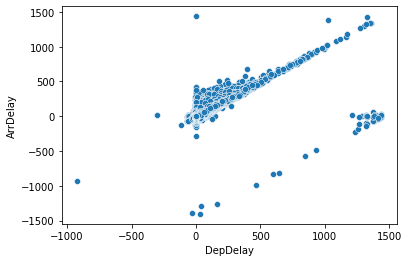

In [34]:
# Check the scatterplot
sns.scatterplot(data=airports, x= 'DepDelay', y = 'ArrDelay')
plt.show()

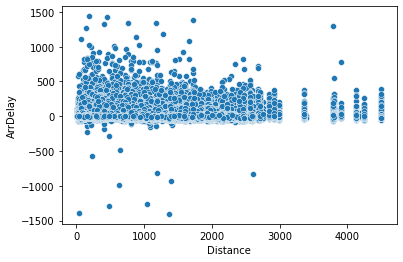

In [44]:
sns.scatterplot(data=airports, x= 'Distance', y = 'ArrDelay')
plt.show()

## Variables based on categories
For example day of week can be seen as category. Weekends can be more busy. As is shown in data as well by second plot with mean of delay per day.
The errors in the plots are the standard error of the mean, defined as:
$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$
In each of the categories there seems to be a difference. 

In [64]:
def plot_with_error_bars(x, y):
    """Function that plots data with the mean of y grouped by the values of x"""
    
    grouped_month = airports.groupby(x).agg([np.mean, np.std, 'count'])[y]
    # Standard error of mean is defined as std / sqrt(n) 
    grouped_month['error'] = grouped_month['std'] / np.sqrt(grouped_month['count'])

    grouped_month.plot(kind = "bar", y = "mean", legend = False,  
              yerr = "error", title = y + " by " + x)
    plt.show()

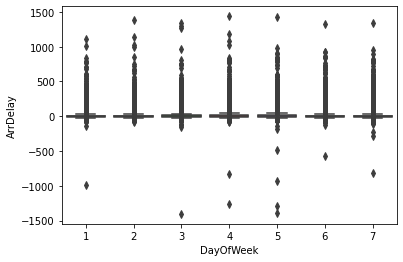

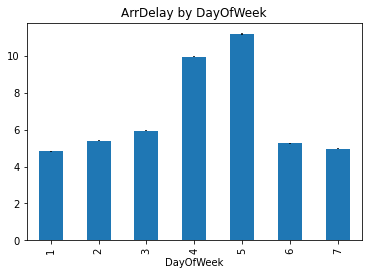

In [66]:
sns.boxplot(data=airports, x= 'DayOfWeek', y = 'ArrDelay')
plt.show()
plot_with_error_bars(x='DayOfWeek', y='ArrDelay')

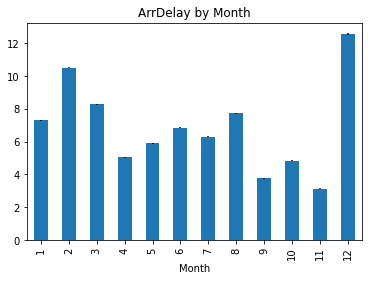

In [65]:
plot_with_error_bars(x='Month', y='ArrDelay')

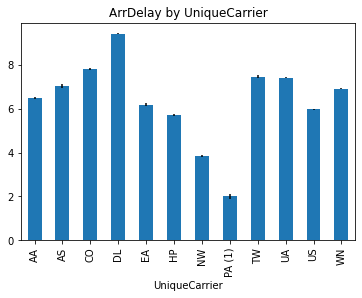

In [67]:
plot_with_error_bars(x='UniqueCarrier', y='ArrDelay')

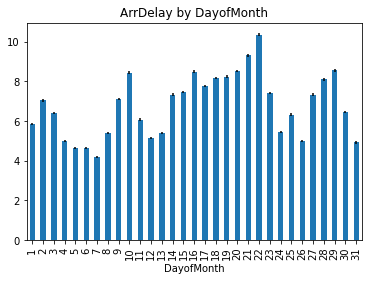

In [69]:
plot_with_error_bars(x='DayofMonth', y="ArrDelay")